In [20]:
import pandas as pd

df = pd.read_csv("shopmania/shopmania_processed.csv", index_col=0)

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
categories = df.category.unique()

In [23]:
pcount = []

for category in categories:
    pcount.append(len(df.loc[df['category'] == category]))

In [24]:
len(df)

313706

In [25]:
df.loc[df['category'] == category].sample(3)

,item_name,category
313691,deago anti fog swimming diving full face mask ...,Water Sports
313704,men 039 s full face breathe free diving snorke...,Water Sports
313701,swimming full face anti fog mask surface divin...,Water Sports


In [26]:
import numpy as np
np.average(pcount)

1651.0842105263157

In [27]:
for idx, category in enumerate(categories):
    if pcount[idx] > 100:
        n_drop = pcount[idx] - 100
        df = df.drop(df.loc[df['category'] == category].sample(n_drop).index)

In [28]:
len(df)

11208

In [29]:
pcount = []

for category in categories:
    pcount.append(len(df.loc[df['category'] == category]))

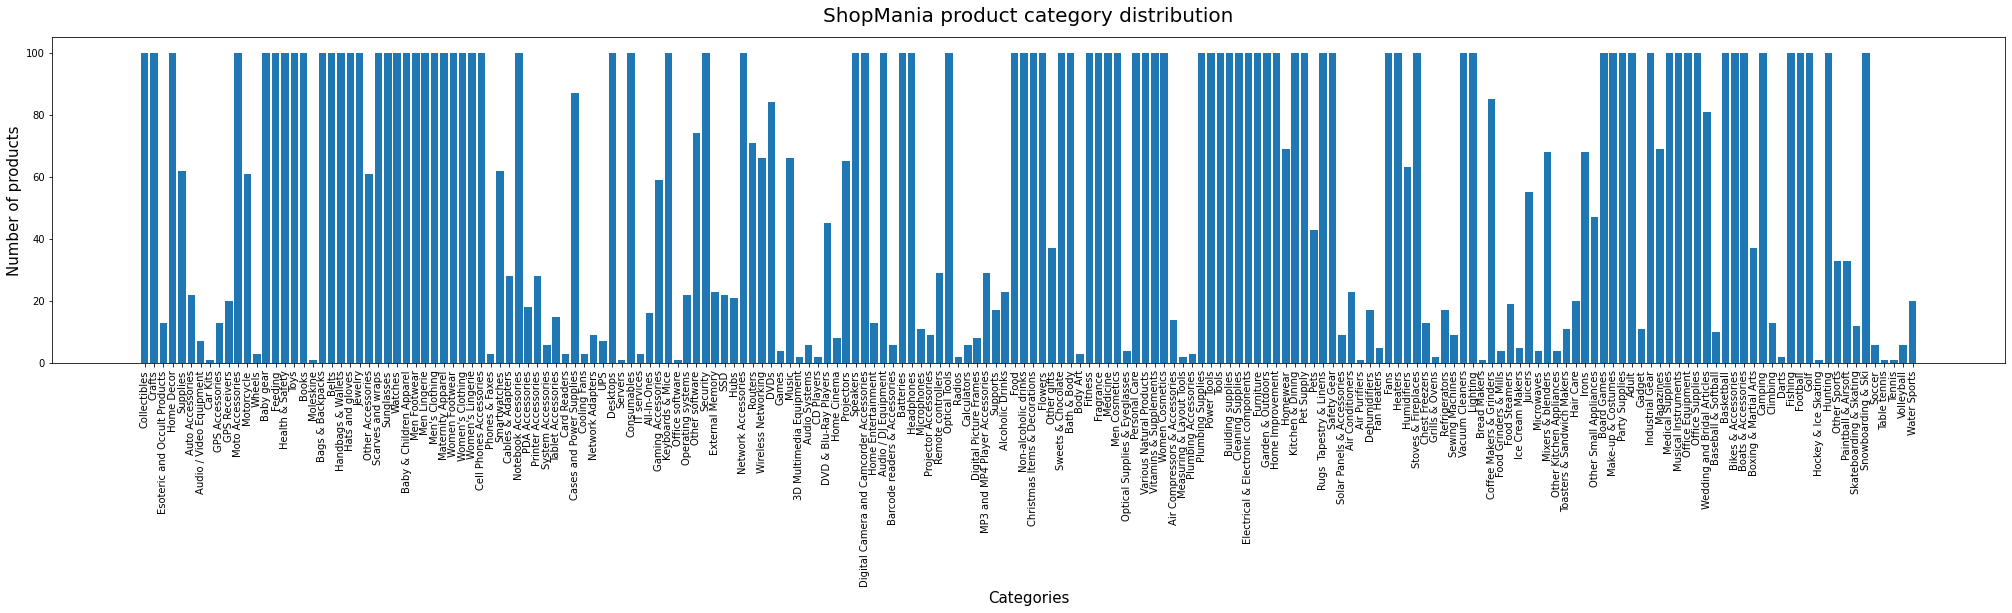

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(35,6))

ax.bar(categories, pcount)
ax.set_xticks(categories)
ax.set_xticklabels(categories, rotation='vertical')

plt.title("ShopMania product category distribution",fontsize=20, pad=15)
plt.xlabel("Categories", fontsize=15)
plt.ylabel("Number of products", fontsize=15)

plt.show()

In [34]:
df.reset_index(drop=True, inplace=True)

In [35]:
df.to_csv("shopmania-reduced-100.csv")